In [41]:
import os

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp

from allensdk.core.brain_observatory_cache import BrainObservatoryCache

In [3]:
drive_path = '/data/allen-brain-observatory/visual-coding-2p'
manifest_path = os.path.join(drive_path, 'manifest.json')

stimulus_name = 'natural_movie_three'

boc = BrainObservatoryCache(manifest_file=manifest_path)

In [6]:
ophys_experiments = pd.DataFrame(boc.get_ophys_experiments(stimuli=[stimulus_name]))

In [7]:
ophys_experiments.head()

,acquisition_age_days,cre_line,donor_name,experiment_container_id,fail_eye_tracking,id,imaging_depth,reporter_line,session_type,specimen_name,targeted_structure
0,90,Nr5a1-Cre,273904,560821491,False,557227804,325,Ai93(TITL-GCaMP6f),three_session_A,Nr5a1-Cre;Camk2a-tTA;Ai93-273904,VISpm
1,101,Rbp4-Cre_KL100,271750,555327033,True,556353209,375,Ai93(TITL-GCaMP6f),three_session_A,Rbp4-Cre;Camk2a-tTA;Ai93-271750,VISam
2,80,Rorb-IRES2-Cre,232623,511500480,True,510390912,275,Ai93(TITL-GCaMP6f),three_session_A,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-232623,VISal
3,92,Cux2-CreERT2,273576,555700037,False,557225279,175,Ai93(TITL-GCaMP6f),three_session_A,Cux2-CreERT2;Camk2a-tTA;Ai93-273576,VISal
4,126,Emx1-IRES-Cre,296704,576714442,False,582838758,375,Ai93(TITL-GCaMP6f),three_session_A,Emx1-IRES-Cre;Camk2a-tTA;Ai93-296704,VISrl


In [10]:
ophys_experiments.columns

Index([u'acquisition_age_days', u'cre_line', u'donor_name',
       u'experiment_container_id', u'fail_eye_tracking', u'id',
       u'imaging_depth', u'reporter_line', u'session_type', u'specimen_name',
       u'targeted_structure'],
      dtype='object')

In [11]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=ophys_experiments['id'].values[0])
stim_template = data_set.get_stimulus_template(stimulus_name)

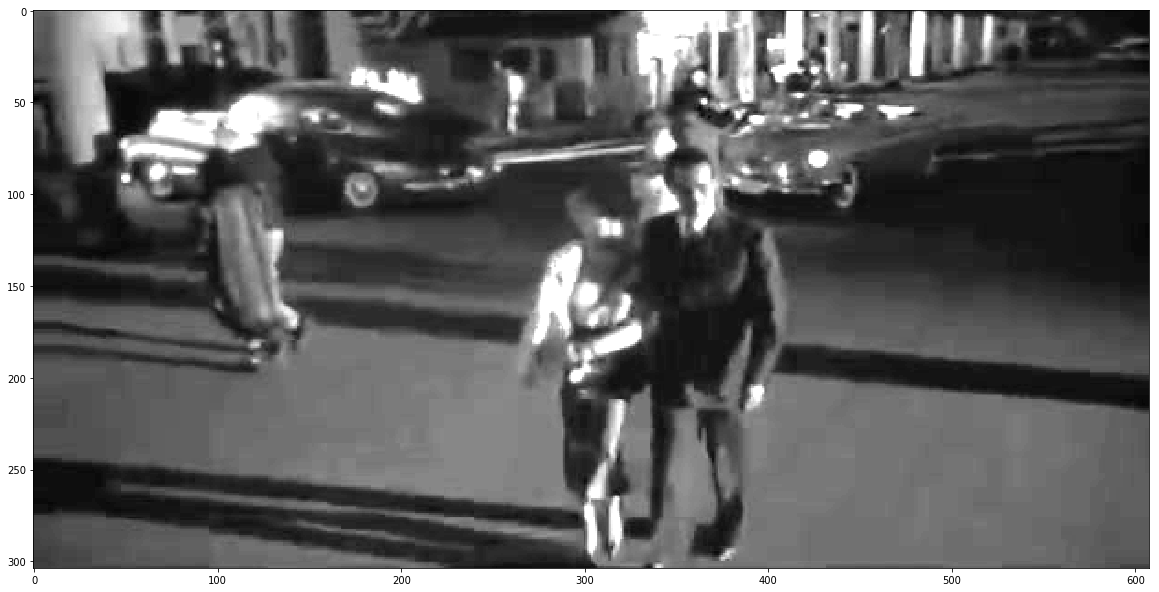

In [12]:
plt.figure(figsize=(20, 20))
plt.imshow(stim_template[1200, :, :], interpolation='none', cmap=plt.cm.gray)
plt.show()

In [14]:
stim_template.shape

(3600, 304, 608)

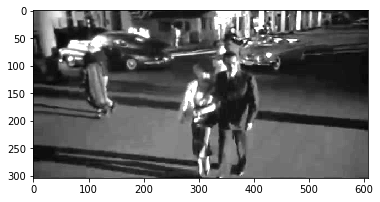

In [57]:
plt.imshow(stim_template[1200, :, :], interpolation='none', cmap=plt.cm.gray)

In [122]:
smoothed = sp.ndimage.filters.gaussian_filter1d( stim_template, 2.0, 2)
smoothed = sp.ndimage.filters.gaussian_filter1d( stim_template, 2.0, 1)
smoothed = sp.ndimage.filters.gaussian_filter1d( stim_template, 1.0, 0)

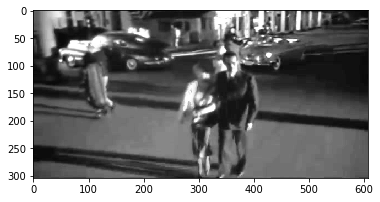

In [116]:
plt.imshow(smoothed[1200,:,:], interpolation='none', cmap=plt.cm.gray)

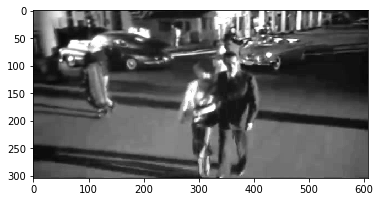

In [117]:
plt.imshow(smoothed[1201,:,:], interpolation='none', cmap=plt.cm.gray)

In [118]:
dframe = smoothed[1201,:,:].astype('f4')-smoothed[1200,:,:].astype('f4')
oframe = stim_template[1202,:,:].astype('f4')-stim_template[1200,:,:].astype('f4')

In [119]:
dframe.dtype

dtype('float32')

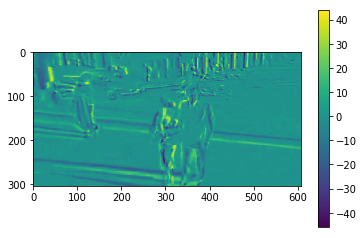

In [120]:
plt.imshow(dframe)
plt.colorbar()

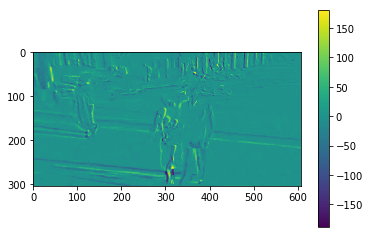

In [121]:
plt.imshow(oframe)
plt.colorbar()